In [109]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [10]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

Bag


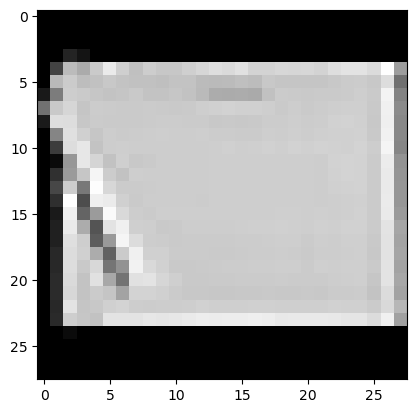

In [113]:
from matplotlib import pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

sample_idx = torch.randint(len(training_data), size=(1,)).item() # randomly choose an index
img, label = training_data[sample_idx] # get img and label from training_data
plt.imshow(img.squeeze(), cmap='gray')
print(labels_map[label])

In [158]:
# dataloader
train_dataloader = DataLoader(training_data,batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=32, shuffle=False)

In [188]:
# Model
class ClassificationModel(nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.flatten = nn.Flatten() # flatten input first
        self.linear1 = nn.Linear(784, 64) # flatten to (Batchsize, flatten size), flatten size, output size
        self.linear2 = nn.Linear(64, 10)  # output layer 
        
    def __call__(self, x):
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [189]:
model = ClassificationModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [187]:
# train
num_epochs = 10
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_dataloader):
        optimizer.zero_grad() # ****important****
        outputs = model(inputs.squeeze()) # squeeze here is important, to eleminate 1 dimention
        loss = loss_fn(outputs, labels)   # here, we have to make sure the shape of outputs and shape of labels is same
        loss.backward() # backward propagation
        optimizer.step()
    print(loss)

tensor(0.2272, grad_fn=<NllLossBackward0>)
tensor(0.4797, grad_fn=<NllLossBackward0>)
tensor(0.2138, grad_fn=<NllLossBackward0>)
tensor(0.2214, grad_fn=<NllLossBackward0>)
tensor(0.2623, grad_fn=<NllLossBackward0>)
tensor(0.3481, grad_fn=<NllLossBackward0>)
tensor(0.4113, grad_fn=<NllLossBackward0>)
tensor(0.2249, grad_fn=<NllLossBackward0>)
tensor(0.3037, grad_fn=<NllLossBackward0>)
tensor(0.1424, grad_fn=<NllLossBackward0>)


In [196]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x
            y = y
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
    
    model.train()

In [197]:
check_accuracy(test_dataloader, model)

Got 1060 / 10000 with accuracy 10.60
